# NAIVE BAYES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv("D:/ExcelR/Data Science(Andheri-Sadanand-Chirag)(21st Aug 2021)/Data Set Files/23.Hamspam.csv",
                 encoding="ISO-8859-1")

In [3]:
data.head(10)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [4]:
data.isnull().sum()

type    0
text    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


## Data Cleaning

In [6]:

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [7]:
data['text'] = data.text.apply(clean)
data.text

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or å£ cash n...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [8]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:10] # for top 10
freq

to     2243
i      2228
you    2118
a      1437
the    1323
u      1298
and     965
is      892
in      886
me      789
dtype: int64

In [9]:
#removing stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [10]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:10] # for top 10
freq_Sw

u       1298
call     577
im       462
ur       389
get      384
å£       293
dont     287
go       282
ok       278
free     275
dtype: int64

In [11]:
# count vectoriser tells the frequency of a word.
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [12]:
word_freq_df.head(10)

,term,occurrences,frequency
0,aa,1,0.000022
1,aah,3,0.000065
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathilove,3,0.000065
5,aathiwhere,3,0.000065
6,ab,1,0.000022
7,abbey,1,0.000022
8,abdomen,1,0.000022
9,abeg,1,0.000022


In [13]:
print(word_freq_df.sort_values('occurrences',ascending = True).head())

         term  occurrences  frequency
0          aa            1   0.000022
4680     nohe            1   0.000022
4679    nofew            1   0.000022
4677    nobut            1   0.000022
4676  nobodys            1   0.000022


In [14]:
#TF-idf
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [15]:
df

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,youve,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## N-gram

In [16]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [17]:
top2_words = get_top_n2_words(data["text"], n=200)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39
5,dont know,38
6,good morning,30
7,po box,28
8,call landline,25
9,take care,24


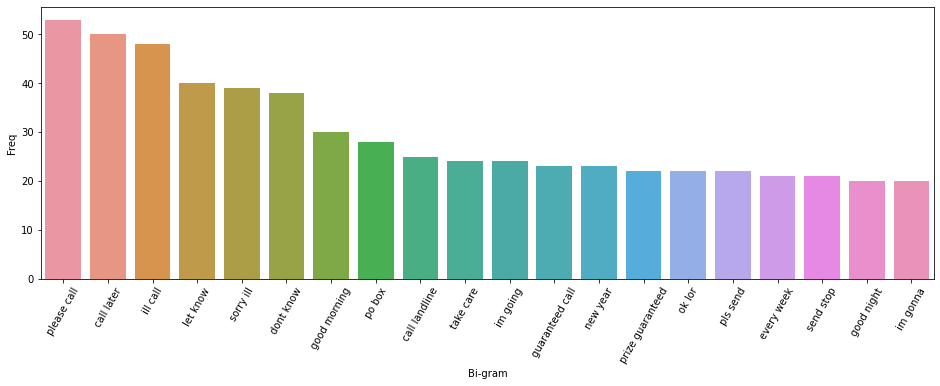

In [18]:
#Bi-gram plot
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (16, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=60,labels = top20_bigram["Bi-gram"]);

In [19]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [20]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [21]:
top3_df

,Tri-gram,Freq
0,ill call later,42
1,sorry ill call,38
2,prize guaranteed call,21
3,call land line,18
4,happy new year,18
...,...,...
195,said mind go,5
196,mind go bedroom,5
197,go bedroom minute,5
198,bedroom minute ok,5


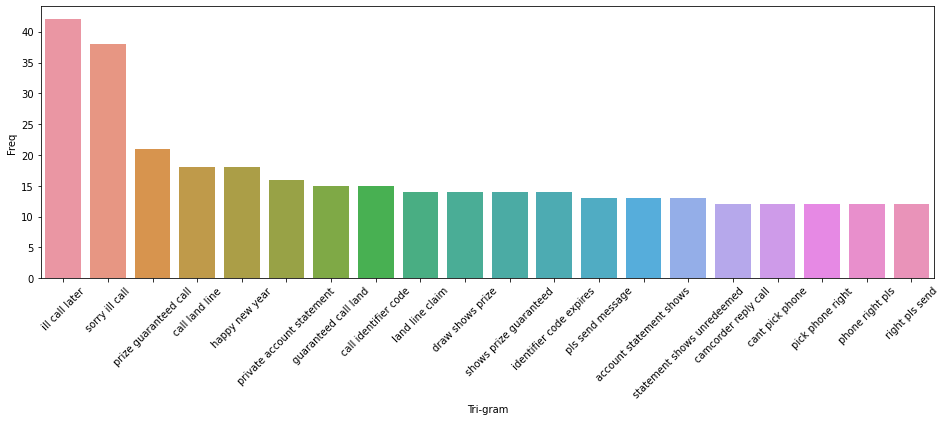

In [22]:
#Tri-gram plot
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (16, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"]);

## Word Cloud

In [23]:
string_Total = " ".join(data["text"])

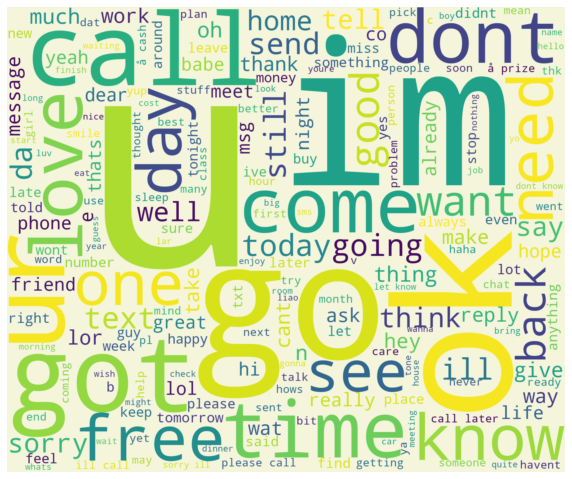

In [24]:
#wordcloud for entire corpus
wordcloud_stw = WordCloud(width=1800,height=1500,background_color='beige').generate(string_Total)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_stw, interpolation='bilinear')
plt.axis('off');

# Applying naive bayes for classification

In [25]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [26]:
#adding white space to merged words
def split_into_words(i):
    return (i.split(" "))

In [27]:
email_train,email_test = train_test_split(data,test_size=0.3)

In [28]:
email_test

,type,text
101,ham,ok give minutes think see btw youre alibi cutt...
695,ham,dear heroi leaving qatar tonite apt opportunit...
5251,ham,hcl chennai requires freshers voice processexc...
4988,ham,cold dont sad dear
507,ham,im coming home dinner
...,...,...
1386,ham,oh unintentionally bad timing great fingers tr...
1567,ham,sister cleared two round birla soft yesterday
5493,spam,£ uk break accommodationvouchers terms conditi...
1520,ham,sorry ill call later


In [29]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)
# format-
# 0-   ["mailing","body","texting"] 
# 1-   ["mailing","awesome","good"]
# 2-   ["mailing","body","texting","good","awesome"]
# -- Matrix--
#       | "mailing" | "body" | "texting" | "good" | "awesome" |
#  0-         1         1         1          0         0
#  1-         1         0         0          1         1    
#  2-         1         1         1          1         1     

In [30]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(5559, 8175)

In [31]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
print("Train-",train_emails_matrix.shape) # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
print("Test-",test_emails_matrix.shape) # (1668,8175)

Train- (3891, 8175)
Test- (1668, 8175)


**Multinomial naive bayes** using CountVectorizer

In [32]:
# Preparing a Multinomial naive bayes model on data set 
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_mc = classifier_mb.predict(train_emails_matrix)
accuracy_train_mc = np.mean(train_pred_mc==email_train.type)

test_pred_mc = classifier_mb.predict(test_emails_matrix)
accuracy_test_mc = np.mean(test_pred_mc==email_test.type)

**Gaussian Naive Bayes** using CountVectorizer

In [33]:
classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values)
# we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_gc = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_gc = np.mean(train_pred_gc==email_train.type)

test_pred_gc = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_gc = np.mean(test_pred_gc==email_test.type)

###  TF-idf

In [34]:
# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)
print("Train -",train_tfidf.shape) # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)
print("Test  -",test_tfidf.shape)#  (1668, 6661)

Train - (3891, 8175)
Test  - (1668, 8175)


**Multinomial naive bayes** using TF-idf

In [35]:
# Preparing a naive bayes model on training data set 
# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_mt = classifier_mb.predict(train_tfidf)
accuracy_train_mt = np.mean(train_pred_mt==email_train.type) 

test_pred_mt = classifier_mb.predict(test_tfidf)
accuracy_test_mt = np.mean(test_pred_mt==email_test.type) 

**Gaussian Naive Bayes** using TF-idf

In [36]:
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) 
#we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_gt = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_gt = np.mean(train_pred_gt==email_train.type) 
test_pred_gt = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_gt = np.mean(test_pred_gt==email_test.type) 
# inplace of TF-idf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

**Accuracy**

In [37]:
print("Multinomial Naive Bayes-CountVectorizer:","\nAccuracy on Test  -",round(accuracy_test_mc*100,2),"%","\nAccuracy on Train -"
      ,round(accuracy_train_mc*100,2),"%")
print("\nGaussian Naive Bayes-CountVectorizer:","\nAccuracy on Test  -",round(accuracy_test_gc*100,2),"%","\nAccuracy on Train -",
      round(accuracy_train_gc*100,2),"%")
print("\nMultinomial Naive Bayes-TF-idf:","\nAccuracy on Test  -",round(accuracy_test_mt*100,2),"%","\nAccuracy on Train -",
      round(accuracy_train_mt*100,2),"%")
print("\nGaussian Naive Bayes-TF-idf:","\nAccuracy on Test  -",round(accuracy_test_gt*100,2),"%","\nAccuracy on Train -",
      round(accuracy_train_gt*100,2),"%")

Multinomial Naive Bayes-CountVectorizer: 
Accuracy on Test  - 96.7 % 
Accuracy on Train - 99.23 %

Gaussian Naive Bayes-CountVectorizer: 
Accuracy on Test  - 87.89 % 
Accuracy on Train - 94.45 %

Multinomial Naive Bayes-TF-idf: 
Accuracy on Test  - 96.16 % 
Accuracy on Train - 97.02 %

Gaussian Naive Bayes-TF-idf: 
Accuracy on Test  - 87.65 % 
Accuracy on Train - 94.45 %


In [38]:
#accuracy for Multinomial Naive Bayes-CountVectorizer using confusion matrix
print(classification_report(email_test.iloc[:,0],test_pred_mc))
print("Accuracy-","%.2f%%" %(accuracy_score(email_test.iloc[:,0],test_pred_mc)*100))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1448
        spam       0.84      0.93      0.88       220

    accuracy                           0.97      1668
   macro avg       0.91      0.95      0.93      1668
weighted avg       0.97      0.97      0.97      1668

Accuracy- 96.70%


**Predictions**

In [39]:
#prediction of test data using Multinomial Naive Bayes-CountVectorizer
pd.DataFrame(test_pred_mc).head(6)

,0
0,ham
1,ham
2,spam
3,ham
4,ham
5,ham


In [40]:
#creating pipeline to predict using Multinomial Naive Bayes 
pipe = Pipeline(steps=[('vectorize', CountVectorizer(ngram_range=(1, 1), token_pattern=r'\b\w+\b')),('classifier', MB())])
pipe.fit(email_train.iloc[:,1], email_train.iloc[:,0])

Pipeline(steps=[('vectorize', CountVectorizer(token_pattern='\\b\\w+\\b')),
                ('classifier', MultinomialNB())])

In [41]:
#new text to classify
SMS = [["WINNER! As a valued network customer you have been selected to received £900 prize reward!To claim call 09061701461."],
       ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."],
       ["I'll come within 5 minutes to meet you"],
       ["No calls..messages..missed calls"],
       ["How are you doing my friend?"],
       ["You just won 50 dollars to have gold"],
       ["Greg, can you call me back once you get this?"],
       ["unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires"],
       ["Winner! To claim your gift call 0908878877"],
       ["Attend this free COVID webinar today: Book your session now"],
       ["Your online account has been locked. Please verify payment information"]]

In [44]:
#predict class and convert to DataFrame
a=[]
for sms in SMS:
    a.append({"Text":sms,"Type":pipe.predict(sms)})
b=pd.DataFrame(a)
b["Text"]=b["Text"].str.get(0)# to remove [] from df
b["Type"]=b["Type"].str.get(0)
b

,Text,Type
0,WINNER! As a valued network customer you have ...,spam
1,I'm gonna be home soon and i don't want to tal...,ham
2,I'll come within 5 minutes to meet you,ham
3,No calls..messages..missed calls,ham
4,How are you doing my friend?,ham
5,You just won 50 dollars to have gold,ham
6,"Greg, can you call me back once you get this?",ham
7,unredeemed Bonus Points. To claim call 0871918...,spam
8,Winner! To claim your gift call 0908878877,spam
9,Attend this free COVID webinar today: Book you...,ham
